In [1]:
from sympy import *

In [2]:
x = Symbol('x')
func = (sin(x)/2 + cos(x)/2) ** 2 * sin(x)
func

(sin(x)/2 + cos(x)/2)**2*sin(x)

Находим периодичность функции

In [3]:
period = periodicity(func, x)
period

2*pi

Так как функция периодична, то количество корней будет бесконечным,
следовательно, будем рассматривать функцию на одном периоде.

In [4]:
period_interval = (-period/2, period/2)
period_interval

(-pi, pi)

Найдем корни уравнения на заданном периоде

In [5]:
roots = solve(func, x)
print(roots)

[0, -pi/4, 3*pi/4, pi]


Чтобы найти интервалы возрастания и убывания нам необходимо найти производные функции и
определить, является-ли значение функции на этом интервале положительным или отрицательным.

In [6]:
diff_func = sorted(solve(diff(func), x))
diff_func.insert(0, period_interval[0])
diff_func.append(period_interval[1])
int_symb = []
for i in range(len(diff_func) - 1):
    if (diff(func).subs(x, (diff_func[i] + diff_func[i+1])/2)) > 0:
        int_symb.append("возрастает")
    else:
        int_symb.append("убывает")
    print(f'На интервале {(diff_func[i], diff_func[i+1])} функция {int_symb[-1]}')

На интервале (-pi, -2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)) функция убывает
На интервале (-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2), -pi/4) функция возрастает
На интервале (-pi/4, 2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2)) функция убывает
На интервале (2*atan(-sqrt(6)*sqrt(sqrt(17) + 5)/2 + 3/2 + sqrt(17)/2), 2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)) функция возрастает
На интервале (2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2), 3*pi/4) функция убывает
На интервале (3*pi/4, 2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2)) функция возрастает
На интервале (2*atan(3/2 + sqrt(17)/2 + sqrt(6)*sqrt(sqrt(17) + 5)/2), pi) функция убывает


Построим график функции на одном периоде

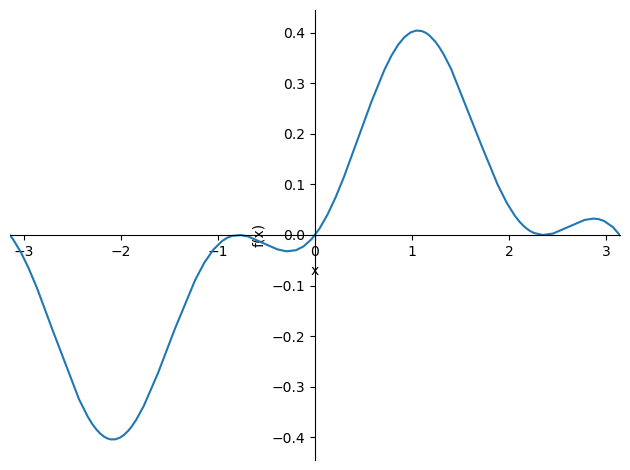

In [7]:
graf = plot(func, xlim = period_interval)

Для того чтобы выделить вершины, нужно, как я понимаю, найти минимум и максимум на периоде. 
Для этого понадобится искать точки, где функция перестает убывать и начинает возрастать, 
что мы уже сделали, когда искали производную.

In [8]:
points = []
for i in diff_func:
    points.append((func.subs(x, i), i))
print(f"Верхняя вершина в коррдинате - {(max(points)[1], max(points)[0])}")
print(f"Нижняя вершина в коррдинате - {(min(points)[1], min(points)[0])}")

Верхняя вершина в коррдинате - (2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2), (cos(2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2))/2 + sin(2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2))/2)**2*sin(2*atan(-sqrt(17)/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + 3/2)))
Нижняя вершина в коррдинате - (-2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2), -(-sin(2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2))/2 + cos(2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2))/2)**2*sin(2*atan(-3/2 + sqrt(6)*sqrt(5 - sqrt(17))/2 + sqrt(17)/2)))


Теперь нам нужно определить, где функция принимает положительные значения, а где отрицательные.
Если учесть тот момент, что корни уравнения являются, по сути, местом, где функция принимает нулевое значение,
то логично, что нам нужно проделать то же самое, что производной, только вместо нее уже корни подставлять

In [9]:
roots = sorted(roots)
roots.insert(0, period_interval[0])
int_symb = []
for i in range(len(roots) - 1):
    if (func.subs(x, (roots[i] + roots[i+1])/2)) > 0:
        int_symb.append("больше нуля")
    else:
        int_symb.append("меньше нуля")
    print(f'На интервале {(roots[i], roots[i+1])} функция {int_symb[-1]}')

На интервале (-pi, -pi/4) функция меньше нуля
На интервале (-pi/4, 0) функция меньше нуля
На интервале (0, 3*pi/4) функция больше нуля
На интервале (3*pi/4, pi) функция больше нуля
